# EDA PROJECT


TODO documentation

In [1]:
# Import necessary libraries
import os, sys

In [2]:
# Access to the path of the folder
path = os.path.dirname(os.getcwd())
sys.path.append(path)

## Data Mining and Data Wrangling

In [3]:
# Import .py file with the cleaned df
from utils_.mining_data_tb import *

In [4]:
# Show the information of each column (Non-Null, dtype, shape)
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61950 entries, 0 to 61949
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61950 non-null  datetime64[ns]
 1   continent                   61950 non-null  object        
 2   country                     61950 non-null  object        
 3   median_age                  61950 non-null  float64       
 4   aged_65_older               61950 non-null  float64       
 5   aged_70_older               61950 non-null  float64       
 6   total_cases                 61950 non-null  float64       
 7   total_deaths                61950 non-null  float64       
 8   hospital_beds_per_thousand  61950 non-null  float64       
 9   gdp_per_capita              61950 non-null  float64       
 10  HDI                         61950 non-null  float64       
 11  deaths_ratio                61950 non-null  float64   

In [5]:
covid_data.date = covid_data["date"].apply(lambda covid_data: covid_data.replace(day=1))

In [6]:
covid_data = covid_data.groupby(["continent", "country", "date"]).max()

In [7]:
covid_data.reset_index(inplace=True)
covid_data

,continent,country,date,median_age,aged_65_older,aged_70_older,total_cases,total_deaths,hospital_beds_per_thousand,gdp_per_capita,HDI,deaths_ratio,non_risky_age,risky_age,Poverty %
0,Africa,Algeria,2020-03-01,29.1,6.211,3.857,716.0,44.0,1.9,13913.839,0.748,12.222222,89.932,10.068,0.8
1,Africa,Algeria,2020-04-01,29.1,6.211,3.857,4006.0,450.0,1.9,13913.839,0.748,15.784165,89.932,10.068,0.8
2,Africa,Algeria,2020-05-01,29.1,6.211,3.857,9394.0,653.0,1.9,13913.839,0.748,10.905152,89.932,10.068,0.8
3,Africa,Algeria,2020-06-01,29.1,6.211,3.857,13907.0,912.0,1.9,13913.839,0.748,7.196286,89.932,10.068,0.8
4,Africa,Algeria,2020-07-01,29.1,6.211,3.857,30394.0,1210.0,1.9,13913.839,0.748,6.446188,89.932,10.068,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,South America,Venezuela,2021-01-01,29.0,6.614,3.915,126927.0,1189.0,0.8,16745.022,0.711,0.936759,89.471,10.529,0.0
2175,South America,Venezuela,2021-02-01,29.0,6.614,3.915,139116.0,1344.0,0.8,16745.022,0.711,0.968387,89.471,10.529,0.0
2176,South America,Venezuela,2021-03-01,29.0,6.614,3.915,160497.0,1602.0,0.8,16745.022,0.711,0.999011,89.471,10.529,0.0
2177,South America,Venezuela,2021-04-01,29.0,6.614,3.915,197683.0,2136.0,0.8,16745.022,0.711,1.080518,89.471,10.529,0.0


In [8]:
import plotly.express as px

In [9]:
def scatter_geo(df, size, name, color, size_max=None): 
    fig = px.scatter_geo(df, locations="country", locationmode="country names", color=color, 
    size=size, # size of markers (one of the columns)
    title=(f'Map of {name}'), size_max=size_max, animation_frame="date")
    
    return fig

In [10]:
scatter_geo(covid_data, "deaths_ratio", "deaths rate", "deaths_ratio", size_max=None)

ValueError: 
    Invalid value of type 'pandas._libs.tslibs.timestamps.Timestamp' received for the 'name' property of frame
        Received value: Timestamp('2020-03-01 00:00:00')

    The 'name' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [5]:
# Show the cleaned data
dtale.show(covid_data)

In [6]:
# Import functions of read, create and write
from utils_.folders_tb import *

In [7]:
# Store csv with the cleaned data
create_csv(covid_data,'../data/cleaned.csv')
create_csv(covid_data, '../src/api/static/cleaned.csv')

### DataFrame Groupby Countries

In [8]:
# Import functions to create subdf
from utils_.create_df import *

In [9]:
# Gruop df by "country" --> Assign it to "covid_groupby"
covid_groupby = groupby_country(covid_data, "country")

In [10]:
# Show df grouped
dtale.show(covid_groupby)

### DATAFRAME SORTED BY GDP



In [11]:
# Creating df for each continent
africa = cases_continent(covid_groupby, "continent", "Africa")
asia = cases_continent(covid_groupby, "continent", "Asia")
europe = cases_continent(covid_groupby, "continent", "Europe")
north_america = cases_continent(covid_groupby, "continent", "North America")
oceania = cases_continent(covid_groupby, "continent", "Oceania")
south_america = cases_continent(covid_groupby, "continent", "South America")

In [12]:
# Take first and  last 5 values of each country
s_gdp_africa = sort_value(africa, "gdp_per_capita")
s_gdp_asia = sort_value(asia, "gdp_per_capita")
s_gdp_europe = sort_value(europe, "gdp_per_capita")
s_gdp_north_america = sort_value(north_america, "gdp_per_capita")
s_gdp_south_america = sort_value(south_america, "gdp_per_capita")
s_gdp_oceania = sort_value(oceania, "gdp_per_capita")

In [13]:
# Join DataFrame of each country in a df of world
s_gdp_world = concatenate_df(s_gdp_africa, s_gdp_asia, s_gdp_europe, s_gdp_north_america, s_gdp_south_america, s_gdp_oceania, "gdp_per_capita")

In [14]:
dtale.show(s_gdp_world)

### DATAFRAME SORTED BY HDI RANK

In [15]:
s_hdi_africa = sort_value(africa, "HDI")
s_hdi_asia = sort_value(asia, "HDI")
s_hdi_europe = sort_value(europe, "HDI")
s_hdi_north_america = sort_value(north_america, "HDI")
s_hdi_south_america = sort_value(south_america, "HDI")
s_hdi_oceania = sort_value(oceania, "HDI")

In [16]:
s_hdi_world = concatenate_df(s_hdi_africa, s_hdi_asia, s_hdi_europe, s_hdi_north_america, s_hdi_south_america, s_hdi_oceania, "HDI")

In [17]:
dtale.show(s_hdi_world)

### DATAFRAME SORTED BY POVERTY RATIO

In [18]:
s_poverty_africa = sort_value(africa, "Poverty %")
s_poverty_asia = sort_value(asia, "Poverty %")
s_poverty_europe = sort_value(europe, "Poverty %")
s_poverty_north_america = sort_value(north_america, "Poverty %")
s_poverty_south_america = sort_value(south_america, "Poverty %")
s_poverty_oceania = sort_value(oceania, "Poverty %")

In [19]:
s_poverty_world = concatenate_df(s_poverty_africa, s_poverty_asia, s_poverty_europe, s_poverty_north_america, s_poverty_south_america, s_poverty_oceania, "HDI")

In [20]:
dtale.show(s_hdi_world)

### DATAFRAME SORTED BY DEATHS RATIO

In [21]:
s_deaths_africa = sort_value(africa, "deaths_ratio")
s_deaths_asia = sort_value(asia, "deaths_ratio")
s_deaths_europe = sort_value(europe, "deaths_ratio")
s_deaths_north_america = sort_value(north_america, "deaths_ratio")
s_deaths_south_america = sort_value(south_america, "deaths_ratio")
s_deaths_oceania = sort_value(oceania, "deaths_ratio")

In [22]:
s_deaths_world = concatenate_df(s_deaths_africa, s_deaths_asia, s_deaths_europe, s_deaths_north_america, s_deaths_south_america, s_deaths_oceania, "deaths_ratio")

In [23]:
dtale.show(s_deaths_world)

In [24]:
import plotly.figure_factory as ff 

In [25]:
def scatter_geo(df, size, name, size_max=None): 
    fig = px.scatter_geo(df, locations="country", locationmode="country names", color="continent", 
    size=size, # size of markers (one of the columns)
    size_max=size_max, title=(f'Map of {name}')
    fig.show()

SyntaxError: invalid syntax (<ipython-input-25-fb68bf99189a>, line 5)

In [48]:
import plotly.express as px
fig = px.scatter_geo(covid_groupby, locations="country", locationmode="country names", color="continent", 
size="deaths_ratio", # size of markers, "pop" is one of the columns of gapminder
title="Map of ratio_deaths")
fig.show()


In [79]:
fig = px.scatter_geo(covid_groupby, locations="country", locationmode="country names", color="continent", 
size="HDI", # size of markers, "pop" is one of the columns of gapminder
title="Map of HDI", size_max=10)
fig.show()


In [75]:
fig = px.scatter_geo(covid_groupby, locations="country", locationmode="country names", color="continent", 
size="total_cases", # size of markers, "pop" is one of the columns of gapminder
title="Map of total cases")
fig.show()

In [29]:
import plotly.express as px
fig = px.scatter_geo(covid_groupby, locations="country", locationmode="country names", color="deaths_ratio", 
size="Poverty %", # size of markers, "pop" is one of the columns of gapminder
title="Map of Poverty %")
fig.show()

In [59]:
fig = px.scatter(covid_groupby, x="gdp_per_capita", y="risky_age", size="deaths_ratio", color="continent",
           hover_name="country",log_x=True, size_max=40, title="deaths_ratio by gdp and risky age")
fig.show()

In [65]:
fig = px.scatter(covid_groupby, x="Poverty %", y="risky_age", size="deaths_ratio", color="continent",
           hover_name="country",log_x=True, size_max=40, title="deaths_ratio by gdp and risky age")
fig.show()

In [50]:
fig = px.scatter(covid_groupby, x="gdp_per_capita", y="hospital_beds_per_thousand", size="deaths_ratio", color="continent",
           hover_name="country",log_x=True, size_max=40)
fig.show()

In [63]:
fig = px.scatter(covid_groupby, x="Poverty %", y="hospital_beds_per_thousand", size="deaths_ratio", color="continent",
           hover_name="country",log_x=True, size_max=40)
fig.show()

In [62]:
fig = px.scatter(covid_groupby, x="Poverty %", y="deaths_ratio", size="hospital_beds_per_thousand", color="continent",
           hover_name="country",log_x=True, size_max=40)
fig.show()

In [53]:
fig = px.scatter(covid_groupby, x="Poverty %", y="gdp_per_capita", size="deaths_ratio", color="continent",
           hover_name="country",log_x=True, size_max=40)
fig.show()

In [74]:
def visualizacion_cuatro(data, suptitle, x1, x2, x3, y, t1, t2, t3, t4, t5, t6, n):

    fig, axes = plt.subplots(2, 4, figsize=(20,20))
    fig.suptitle(suptitle)

    sns.barplot(ax=axes[0, 0], data=data.head(n), x=x1, y=y, color="b", alpha=0.5).set(xlabel=None)

    sns.barplot(ax=axes[0, 1], data=data.head(n), x=x2, y=y, color="m", alpha=0.5).set(xlabel=None, ylabel=None, yticklabels=[])

    sns.barplot(ax=axes[0, 2], data=data.head(n), x=x3, y=y, color="g", alpha=0.5).set(xlabel=None, ylabel=None, yticklabels=[])

    sns.barplot(ax=axes[1, 0], data=data.tail(n), x=x1, y=y, color="b", alpha=0.5, label=x1)

    sns.barplot(ax=axes[1, 1], data=data.tail(n), x=x2, y=y, color="m", alpha=0.5, label=x2).set(ylabel=None, yticklabels=[])

    sns.barplot(ax=axes[1, 2], data=data.head(n), x=x3, y=y, color="g", alpha=0.5).set(xlabel=None, ylabel=None, yticklabels=[])
    plt.legend()

    axes[0, 0].set_title(t1)
    axes[0, 1].set_title(t2)
    axes[0, 2].set_title(t3)
    axes[1, 0].set_title(t4)
    axes[1, 1].set_title(t5)
    axes[1, 2].set_title(t6)
    plt.subplots_adjust(wspace=0.02, hspace=0.1)

2021-06-01 12:20:36,849 - WARNING  - No handles with labels found to put in legend.


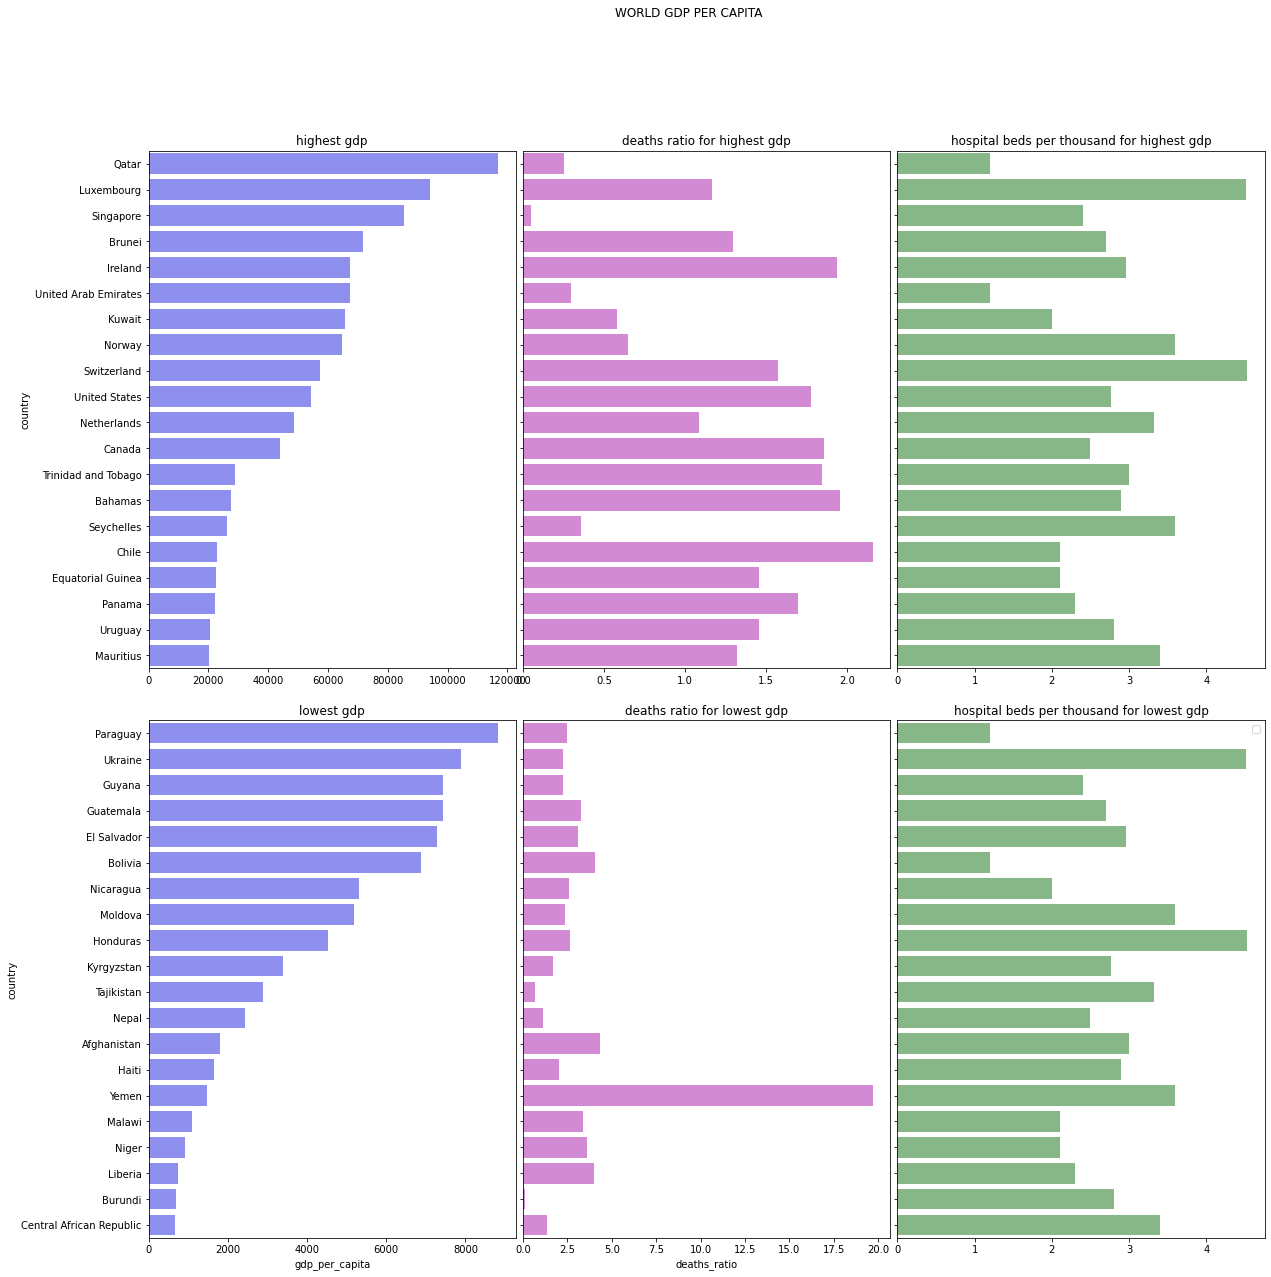

In [72]:
visualizacion_cuatro(s_gdp_world, 'WORLD GDP PER CAPITA', "gdp_per_capita", "deaths_ratio", "hospital_beds_per_thousand", "country", "highest gdp", "deaths ratio for highest gdp", "hospital beds per thousand for highest gdp", "lowest gdp", "deaths ratio for lowest gdp", "hospital beds per thousand for lowest gdp", 20)

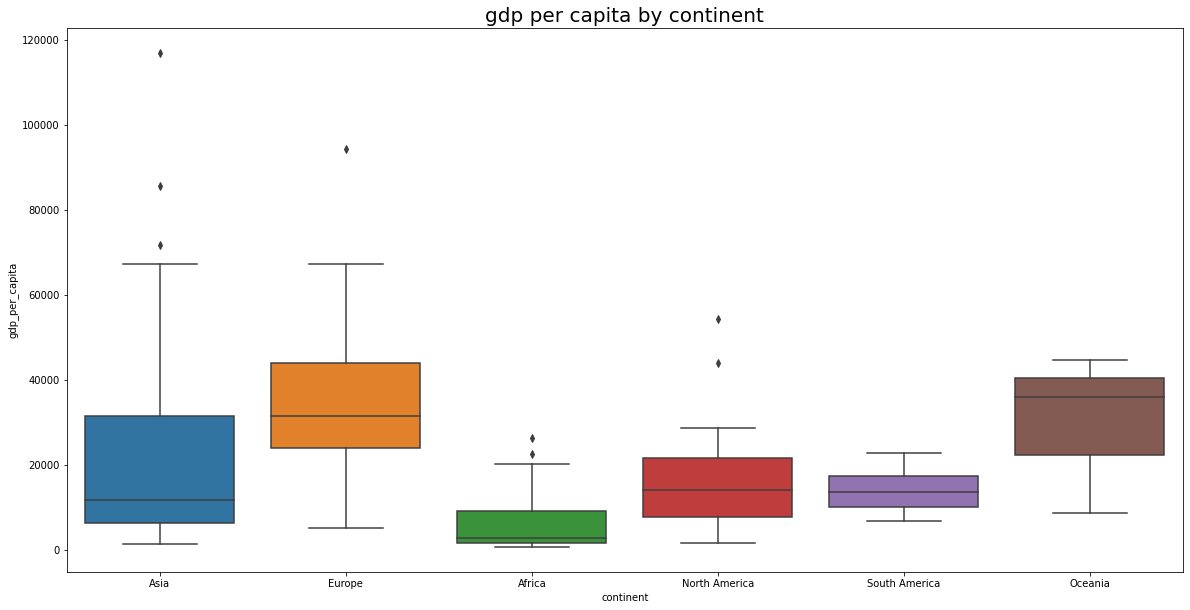

In [90]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="continent", y="gdp_per_capita", data=covid_groupby).set_title("gdp per capita by continent", fontsize=20)



In [ ]:
fig,ax=plt.subplots(1,figsize=(30,10),sharey=True)

ax=sns.lineplot(x=s_gdp_africa['deaths_ratio'], y=s_gdp_africa["gdp_per_capita"], data=s_gdp_africa,hue="country",marker="s", linestyle="-.",linewidth=3.0)
ax.legend(title="Países",loc="upper left")
ax.set_xlabel("gdp_per_capita",fontsize=14)
ax.set_ylabel("deaths_ratio",color="red",fontsize=14)
ax2=ax.twinx()
ax2=sns.lineplot(x=s_gdp_africa['deaths_ratio'], y=s_gdp_africa["gdp_per_capita"],data=s_gdp_africa,hue="cou",marker="o", linestyle="-",linewidth=3.0,legend=False,)


ax2.set_ylabel("Importaciones País - EU",color="blue",fontsize=14)
plt.xlim(0)